# [Tensorflow 2.x]  MNIST

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

<br>

### 1. Prepare Train & Test data

#### Train & Test split

In [2]:
# tf.example.tutorials.datasets
# tf.keras.datasets

In [3]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

print(train_data.shape) # train 60000, each data = 28px * 28px
print(test_data.shape) # test 10000
print(train_data.dtype) # int
print(train_data.max()) # 0~255

(60000, 28, 28)
(10000, 28, 28)
uint8
255


In [4]:
train_data[0].shape # 28px * 28px

(28, 28)

#### Normalization

In [5]:
# (60000, 28*28) -> (60000, 784) 행렬 변환 + scaling (최대가 1이 되도록 최대값으로 나눠줌)
train_data = train_data.reshape(60000, 784).astype('float32') / 255.0 # 0~255 -> 0~1
test_data = test_data.reshape(10000, 784).astype('float32') / 255.0 # 0~255 -> 0~1

#### One-hot encoding

In [6]:
train_label[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# tf.keras.utils
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [8]:
train_label[0, :10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

<br>

### 2. Build the model & Set the criterion

In [9]:
model = models.Sequential()

In [15]:
# input_dim: input data의 차원 수(열) -> 지정해줘야함
# units: 퍼셉트론 수
# activation='활성화함수 타입',
# kernel_initializer='theta 초기화 기법' xavier(default)
# kernel_regularizer='l1', l2

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 
# (Output) Dense-layer with softmax function, 0~9 -> 10

In [16]:
from tensorflow.keras import optimizers

# learning rate 직접 세팅하여 옵티마이저 생성
optimizers.Adam(lr=0.001) # learning rate

In [17]:
# 모델 학습 전 세팅
model.compile(optimizer='adam', # optimizers.Adam()
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy]) # metrics=['accuracy'])
# Precision / Recall / F1-Score 등 적용 가능

<br>

### 3. Train the model

In [18]:
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 10s 216us/sample - loss: 0.0925 - categorical_accuracy: 0.9801 - val_loss: 0.1261 - val_categorical_accuracy: 0.9784
Epoch 2/15
48000/48000 [==============================] - 9s 179us/sample - loss: 0.0623 - categorical_accuracy: 0.9872 - val_loss: 0.1151 - val_categorical_accuracy: 0.9780
Epoch 3/15
48000/48000 [==============================] - 9s 181us/sample - loss: 0.0543 - categorical_accuracy: 0.9877 - val_loss: 0.1019 - val_categorical_accuracy: 0.9810
Epoch 4/15
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0444 - categorical_accuracy: 0.9893 - val_loss: 0.1062 - val_categorical_accuracy: 0.9797
Epoch 5/15
48000/48000 [==============================] - 9s 182us/sample - loss: 0.0459 - categorical_accuracy: 0.9888 - val_loss: 0.0977 - val_categorical_accuracy: 0.9797
Epoch 6/15
48000/48000 [==============================] - 9s 181us/sample - los

<br>

### 4. Test the model

In [19]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0834 - categorical_accuracy: 0.9812
loss (cross-entropy) : 0.08344285983243026
test accuracy : 0.9812


<br>

### 5. Visualize the result

In [20]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

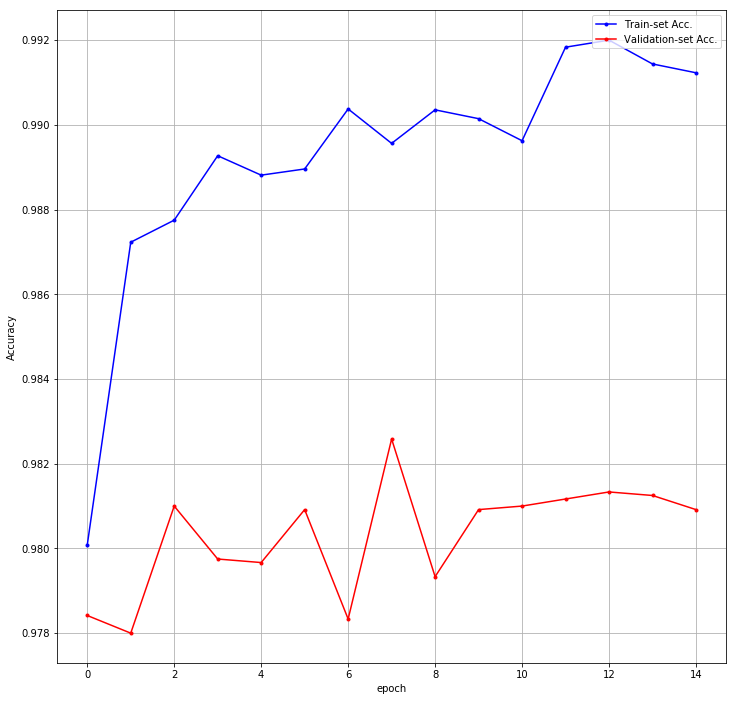

In [21]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

x_len = np.arange(len(acc)) # x좌표 직접 생성
plt.figure(figsize=(12, 12))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

overfitting...